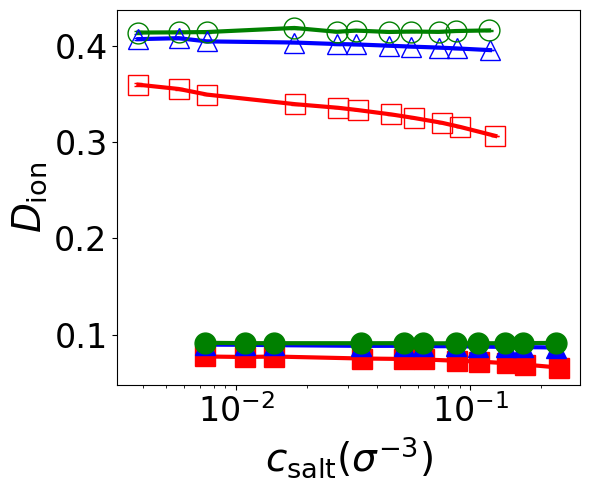

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Load concentrate volume ( 그대로 유지 ) ----------
concentrate_file = "concentrate_volume.csv"
concentrate_data = pd.read_csv(concentrate_file)
for col in concentrate_data.columns:
    globals()[col] = concentrate_data[col].dropna().to_numpy()

# ---------- Load Dpp / Dmm from multiple MD files ---------- #
def load_dpp_dmm(eps, model):
    # 파일 이름: Diffusion_fit_MD_0.2_LJ.csv
    fname = f"Diffusion_fit_MD_{eps}_{model}.csv"
    df = pd.read_csv(fname)

    D_cat = df["Dpp"].values        # D++
    D_cat_err = df["Dpp_err"].values
    D_ani = df["Dmm"].values        # D--
    D_ani_err = df["Dmm_err"].values

    return D_cat, D_cat_err, D_ani, D_ani_err

# ---------- Compute averaged D + error propagation ---------- #
def avg_with_error(cat, ani, cat_err, ani_err):
    D_mean = 0.5 * (cat + ani)
    D_err = 0.5 * np.sqrt(cat_err**2 + ani_err**2)
    return D_mean, D_err

D_mean, D_err = {}, {}

for eps in ['0.2', '1', '5']:

    eps_key = eps.replace('.', '')  # 0.2→02

    # ---- LJ ----
    D_cat, D_cat_err, D_ani, D_ani_err = load_dpp_dmm(eps, "LJ")
    D_mean[f"{eps_key}_lj"], D_err[f"{eps_key}_lj"] = avg_with_error(
        D_cat, D_ani, D_cat_err, D_ani_err
    )

    # ---- WCA ----
    D_cat, D_cat_err, D_ani, D_ani_err = load_dpp_dmm(eps, "WCA")
    D_mean[f"{eps_key}_wca"], D_err[f"{eps_key}_wca"] = avg_with_error(
        D_cat, D_ani, D_cat_err, D_ani_err
    )

# ---------- Plot (same style as saved template) ---------- #
color_map = {'0.2': 'red', '1': 'blue', '5': 'green'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax1 = plt.subplots(figsize=(6, 5))

# ---------- LJ (filled markers) ----------
for eps in ['0.2', '1', '5']:
    eps_key = eps.replace('.', '')
    # x = mean_c_salt_02_lj 같은 변수명을 globals에서 가져오기
    eps_temp = "02" if eps == "0.2" else eps
    x = globals()[f"mean_c_salt_{eps_temp}_lj"]

    ax1.plot(x, D_mean[f"{eps_key}_lj"], color=color_map[eps], lw=3)
    ax1.errorbar(
        x, D_mean[f"{eps_key}_lj"], yerr=D_err[f"{eps_key}_lj"],
        fmt=marker_map[eps], color=color_map[eps],
        mfc=color_map[eps], mec=color_map[eps],
        markersize=15, elinewidth=1, capsize=3,
        label=f"{eps} LJ"
    )

# ---------- WCA (open markers) ----------
for eps in ['0.2', '1', '5']:
    eps_key = eps.replace('.', '')
    eps_temp = "02" if eps == "0.2" else eps
    x = globals()[f"mean_c_salt_{eps_temp}_wca"]

    ax1.plot(x, D_mean[f"{eps_key}_wca"], color=color_map[eps], lw=3)
    ax1.errorbar(
        x, D_mean[f"{eps_key}_wca"], yerr=D_err[f"{eps_key}_wca"],
        fmt=marker_map[eps], color=color_map[eps],
        mfc='none', mec=color_map[eps],
        markersize=15, elinewidth=1, capsize=3,
        label=f"{eps} WCA"
    )

# ---------- Axes ----------
ax1.set_xlabel(r'$c_{\mathrm{salt}} (\sigma^{-3})$', fontsize=28)
ax1.set_ylabel(r'$D_{\mathrm{ion}}$', fontsize=28)
ax1.tick_params(axis='both', which='major', labelsize=24)
ax1.set_xscale("log")

plt.tight_layout()
plt.show()